##Importing all the libraries

In [4]:
from sklearn.preprocessing import OneHotEncoder
from flask import Flask, render_template, request
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from scipy.stats import zscore
# from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
# from sklearn.svm import SVR
import seaborn as sns

import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [5]:
def posix_time(dt):
    return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)



#importing the dataset




In [18]:
data = pd.read_csv('Train.csv')


#taking the required features or columns
Collecting the data


In [47]:
data = data.sort_values(
    by=['date_time'], ascending=True).reset_index(drop=True)
last_n_hours = [1, 2, 3, 4, 5, 6]
for n in last_n_hours:
    data[f'last_{n}_hour_traffic'] = data['traffic_volume'].shift(n)
data = data.dropna().reset_index(drop=True)
data.loc[data['is_holiday'] != 'None', 'is_holiday'] = 1
data.loc[data['is_holiday'] == 'None', 'is_holiday'] = 0
data['is_holiday'] = data['is_holiday'].astype(int)

data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].map(lambda x: int(x.strftime("%H")))
data['month_day'] = data['date_time'].map(lambda x: int(x.strftime("%d")))
data['weekday'] = data['date_time'].map(lambda x: x.weekday()+1)
data['month'] = data['date_time'].map(lambda x: int(x.strftime("%m")))
data['year'] = data['date_time'].map(lambda x: int(x.strftime("%Y")))
data.to_csv("traffic_volume_data.csv", index=None)

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

data = pd.read_csv("traffic_volume_data.csv")

# ✅ Safely sample up to 10,000 rows only if available
data = data.sample(n=min(10000, len(data)), replace=False).reset_index(drop=True)

label_columns = ['weather_type', 'weather_description']
numeric_columns = ['is_holiday', 'temperature',
                   'weekday', 'hour', 'month_day', 'year', 'month']


In [28]:
features = numeric_columns+label_columns
X = data[features]
X.head()

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,286.37,1,0,27,2013,5,Clouds,overcast clouds
1,1,289.20,5,0,3,2015,7,Clear,sky is clear
2,1,274.34,4,0,24,2016,11,Mist,mist
3,1,277.22,4,0,26,2015,11,Haze,haze
4,1,293.17,1,0,5,2016,9,Rain,moderate rain


In [29]:
X.shape


(43, 9)

In [32]:
from functools import reduce
import pandas as pd

def unique(list1):
    ans = reduce(lambda re, x: re + [x] if x not in re else re, list1, [])
    print(ans)

n1 = data['weather_type']
n2 = data['weather_description']

unique(n1)
unique(n2)

n1features = ['Rain', 'Clouds', 'Clear', 'Snow', 'Mist',
              'Drizzle', 'Haze', 'Thunderstorm', 'Fog', 'Smoke', 'Squall']
n2features = ['light rain', 'few clouds', 'Sky is Clear', 'light snow', 'sky is clear', 'mist', 'broken clouds', 'moderate rain', 'drizzle', 'overcast clouds', 'scattered clouds', 'haze', 'proximity thunderstorm', 'light intensity drizzle', 'heavy snow', 'heavy intensity rain', 'fog', 'heavy intensity drizzle', 'shower snow', 'snow', 'thunderstorm with rain',
              'thunderstorm with heavy rain', 'thunderstorm with light rain', 'proximity thunderstorm with rain', 'thunderstorm with drizzle', 'smoke', 'thunderstorm', 'proximity shower rain', 'very heavy rain', 'proximity thunderstorm with drizzle', 'light rain and snow', 'light intensity shower rain', 'SQUALLS', 'shower drizzle', 'thunderstorm with light drizzle']

n11 = []
n22 = []

for i in range(len(data)):
    # Convert to string to avoid issues with NaN or mixed types
    type_val = str(n1.iloc[i])
    desc_val = str(n2.iloc[i])
    
    # Encode weather_type
    if type_val in n1features:
        n11.append(n1features.index(type_val) + 1)
    else:
        n11.append(0)

    # Encode weather_description
    if desc_val in n2features:
        n22.append(n2features.index(desc_val) + 1)
    else:
        n22.append(0)

# Replace columns in the dataframe
data['weather_type'] = n11
data['weather_description'] = n22


[2, 3, 5, 7, 1, 4, 8]
[10, 5, 6, 12, 8, 11, 3, 4, 7, 2, 13, 1]


#Data Preparation

In [12]:
features = numeric_columns+label_columns
target = ['traffic_volume']
X = data[features]
y = data[target]

In [13]:
X.head(6)

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,0,275.97,7,21,10,2013,11,2,7
1,0,273.39,3,21,27,2013,2,2,10
2,0,260.41,4,10,12,2013,12,2,7
3,0,301.73,5,20,14,2015,8,3,5
4,0,259.98,2,20,24,2013,12,4,4
5,0,285.93,3,0,4,2016,5,3,5


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

[[<Axes: title={'center': 'is_holiday'}>
  <Axes: title={'center': 'temperature'}>
  <Axes: title={'center': 'weekday'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'month_day'}>
  <Axes: title={'center': 'year'}>]
 [<Axes: title={'center': 'month'}>
  <Axes: title={'center': 'weather_type'}>
  <Axes: title={'center': 'weather_description'}>]]


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

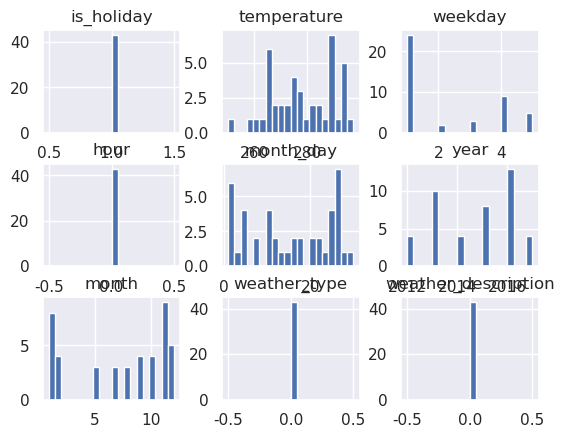

In [33]:
print(data[features].hist(bins=20,))

In [14]:
# data['traffic_volume'].hist(bins=20)

#Feature Scaling

In [37]:
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')


label_columns = ['weather_type', 'weather_description']
numeric_columns = ['is_holiday', 'temperature', 'weekday', 'hour', 'month_day', 'year', 'month']


X = data[numeric_columns + label_columns]
y = data[['traffic_volume']]  


print("Before scaling:")
print(X.dtypes)
print(X.head())


x_scaler = MinMaxScaler()
X_scaled = x_scaler.fit_transform(X)


y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y).flatten()

print("\nAfter scaling:")
print("X (first 5 rows):\n", X_scaled[:5])
print("y (first 5 values):\n", y_scaled[:5])


Before scaling:
is_holiday               int64
temperature            float64
weekday                  int64
hour                     int64
month_day                int64
year                     int64
month                    int64
weather_type             int64
weather_description      int64
dtype: object
   is_holiday  temperature  weekday  hour  month_day  year  month  \
0           1       286.37        1     0         27  2013      5   
1           1       289.20        5     0          3  2015      7   
2           1       274.34        4     0         24  2016     11   
3           1       277.22        4     0         26  2015     11   
4           1       293.17        1     0          5  2016      9   

   weather_type  weather_description  
0             0                    0  
1             0                    0  
2             0                    0  
3             0                    0  
4             0                    0  

After scaling:
X (first 5 rows):
 [[0.   

In [38]:
print(X[:5])

   is_holiday  temperature  weekday  hour  month_day  year  month  \
0           1       286.37        1     0         27  2013      5   
1           1       289.20        5     0          3  2015      7   
2           1       274.34        4     0         24  2016     11   
3           1       277.22        4     0         26  2015     11   
4           1       293.17        1     0          5  2016      9   

   weather_type  weather_description  
0             0                    0  
1             0                    0  
2             0                    0  
3             0                    0  
4             0                    0  


#Visualization

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

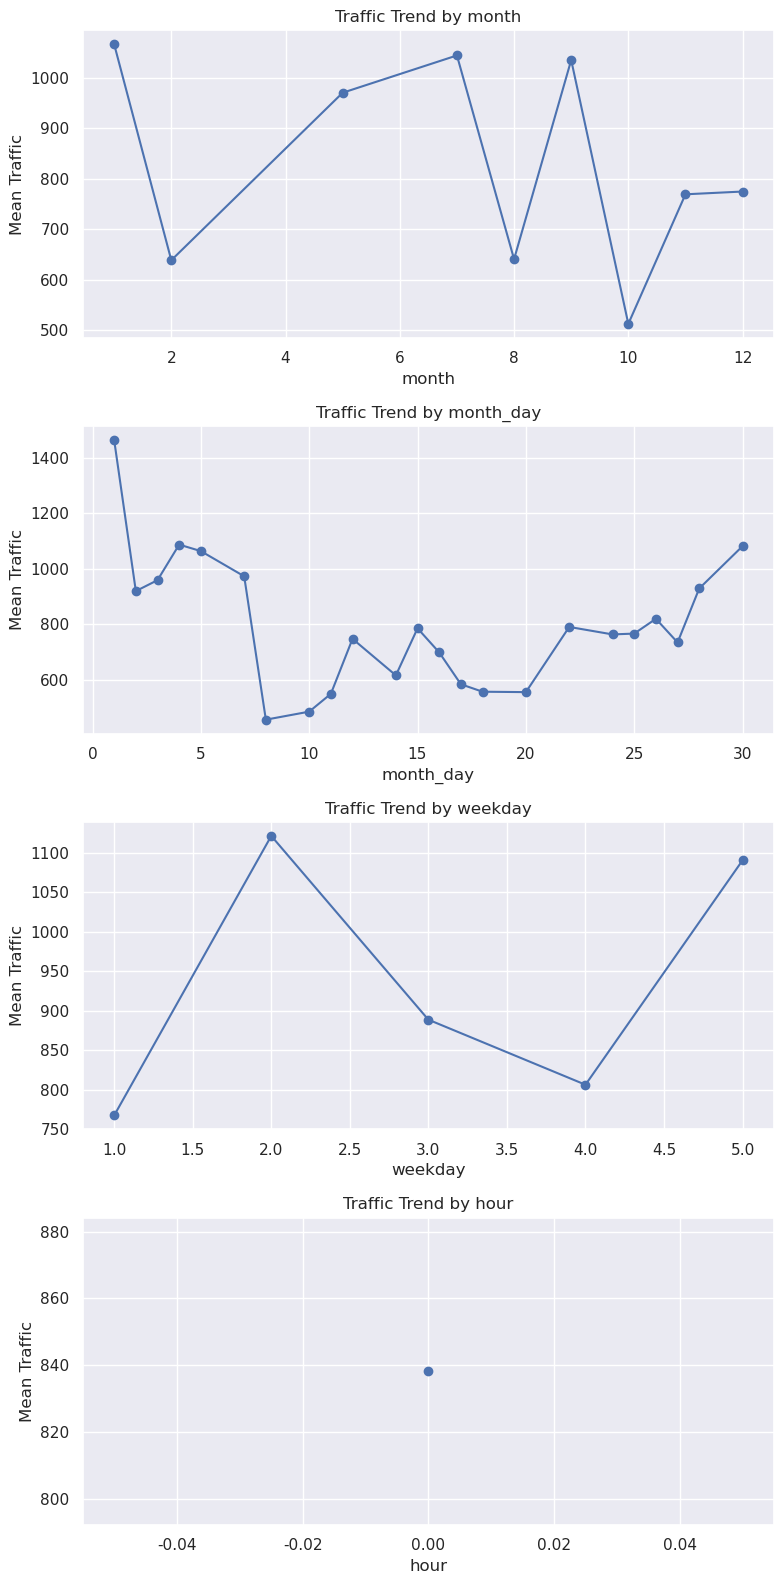

In [39]:
metrics = ['month', 'month_day', 'weekday', 'hour']
fig = plt.figure(figsize=(8, 4*len(metrics)))
for i, metric in enumerate(metrics):
	ax = fig.add_subplot(len(metrics), 1, i+1)
	ax.plot(data.groupby(metric)['traffic_volume'].mean(), '-o')
	ax.set_xlabel(metric)
	ax.set_ylabel("Mean Traffic")
	ax.set_title(f"Traffic Trend by {metric}")
plt.tight_layout()
plt.show()

#Train the Model

In [40]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X, y)
new = []
print('predicted output :=',regr.predict(X[:10]))
print('Actual output :=',y[:10])

predicted output := [870.44119948 866.36428776 870.86834185 871.70704859 867.92454739
 872.29350685 866.35284967 858.57730601 868.91690663 871.70704859]
Actual output :=    traffic_volume
0             863
1             959
2             763
3             833
4            1064
5             967
6             615
7            1513
8             572
9             833


In [41]:
# error eval
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
y_pred = regr.predict(testX)
print('Mean Absolute Error:', mean_absolute_error(testY, y_pred))
##############################

Mean Absolute Error: 189.64186134048467


In [42]:
print(features)

['is_holiday', 'temperature', 'weekday', 'hour', 'month_day', 'year', 'month', 'weather_type', 'weather_description']


In [43]:
data[features].head(5)

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,286.37,1,0,27,2013,5,0,0
1,1,289.20,5,0,3,2015,7,0,0
2,1,274.34,4,0,24,2016,11,0,0
3,1,277.22,4,0,26,2015,11,0,0
4,1,293.17,1,0,5,2016,9,0,0


#User input

In [44]:
ip=[0,89,2,288.28,1,9,2,2012,10]
ip = x_scaler.transform([ip])
out=regr.predict(ip)
print('Before inverse Scaling :',out)

Before inverse Scaling : [5.52880925]


In [45]:
y_pred = y_scaler.inverse_transform([out])
print('Traffic Volume : ',y_pred)

Traffic Volume :  [[6304.48018135]]


In [46]:
if(y_pred<=1000):
  print("No Traffic ")
elif y_pred>1000 and y_pred<=3000:
  print("Busy or Normal Traffic")
elif y_pred>3000 and y_pred<=5500:
  print("heavy Traffic")
else:
  print("Worst case")

Worst case


#Evaluating Metrics 

In [ ]:
# def relative_absolute_error(true, pred):
#     true_mean = np.mean(true)
#     squared_error_num = np.sum(np.abs(true - pred))
#     squared_error_den = np.sum(np.abs(true - true_mean))
#     rae_loss = squared_error_num / squared_error_den
#     return rae_loss
# def mean_bias_error(true, pred):
#     bias_error = true - pred
#     mbe_loss = np.mean(np.sum(diff) / true.size)
#     return mbe_loss
# def mean_absolute_percentage_error(true, pred):
#     abs_error = (np.abs(true - pred)) / true
#     sum_abs_error = np.sum(abs_error)
#     mape_loss = (sum_abs_error / true.size) * 100
#     return mape_loss
# def mean_squared_error(true, pred):
#     squared_error = np.square(true - pred) 
#     sum_squared_error = np.sum(squared_error)
#     mse_loss = sum_squared_error / true.size
#     return mse_loss
# def root_mean_squared_error(true, pred):
#     squared_error = np.square(true - pred) 
#     sum_squared_error = np.sum(squared_error)
#     rmse_loss = np.sqrt(sum_squared_error / true.size)
#     return rmse_loss